<a href="https://colab.research.google.com/github/peo042/PythonLabs/blob/main/Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Problem 1: Import iris dataset

import pandas as pd

data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header = None)

data.columns = ["sepal width (cm)", "sepal length (cm)", "petal width (cm)", "petal length (cm)", "class"]

#print first five rows
data.head()

,sepal width (cm),sepal length (cm),petal width (cm),petal length (cm),class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
#Summarize data using .info and .shape

data.info()
print("\nThe size of the iris dataset is {}".format(data.size))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal width (cm)   150 non-null    float64
 1   sepal length (cm)  150 non-null    float64
 2   petal width (cm)   150 non-null    float64
 3   petal length (cm)  150 non-null    float64
 4   class              150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB

The size of the iris dataset is 750


In [3]:
#Print out the statistics for the continuous columns

print(data.describe())
print("\nThe number of rows in each class is: \n{}".format(data.count()))

       sepal width (cm)  sepal length (cm)  petal width (cm)  petal length (cm)
count        150.000000         150.000000        150.000000         150.000000
mean           5.843333           3.054000          3.758667           1.198667
std            0.828066           0.433594          1.764420           0.763161
min            4.300000           2.000000          1.000000           0.100000
25%            5.100000           2.800000          1.600000           0.300000
50%            5.800000           3.000000          4.350000           1.300000
75%            6.400000           3.300000          5.100000           1.800000
max            7.900000           4.400000          6.900000           2.500000

The number of rows in each class is: 
sepal width (cm)     150
sepal length (cm)    150
petal width (cm)     150
petal length (cm)    150
class                150
dtype: int64


In [4]:
#Seperate the first four columns in data into a new dataframe

new = data.drop('class', 1)

#print first five rows
new.head()

,sepal width (cm),sepal length (cm),petal width (cm),petal length (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


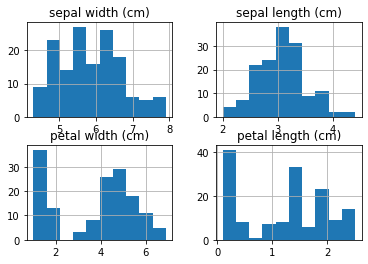

In [5]:
#Plot a histogram for each column in new

histogram = new.hist()

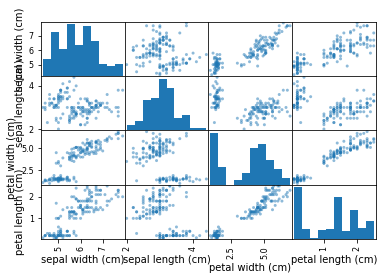

In [6]:
#Plot a scatterplot using pandas

scatter = pd.plotting.scatter_matrix(new)

In [15]:
#Problem 2

#Import data

census = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", header=None, na_values=["?", " ?", "? ", " ? "] 
                     ,names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex",
                             "capital-gain", "capital-loss", "hours-per-week", "native-country", "salary"])

#print first 5 rows
census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
#Check for null objects using .info
census.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
#Sum of null values in each column
census.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

In [10]:
#Create a dataframe to find null values
badcensus = census.isnull().any(axis=1)

#create dummy list to store row indicies
badrows=[]

#Loop through the new dataframe and append the index value to the list
for index, row in enumerate(badcensus):
  if row == True:
    badrows.append(index)

#Create new dataframe using the list
newcensus = census.iloc[badrows]

#Print first five rows of the dataframe with only rows containing null values
newcensus.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,NaN,>50K
27,54,NaN,180211,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,NaN,>50K
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,NaN,<=50K
61,32,NaN,293936,7th-8th,4,Married-spouse-absent,NaN,Not-in-family,White,Male,0,0,40,NaN,<=50K


In [11]:
#Drop the null rows
census.dropna(inplace=True)

In [12]:
#Recheck if null values exist in each column
census.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64